In [7]:
import numpy as np
#from complete_mfcc import X
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

x=[[-130.44264,124.75439,-25.909184,17.528477,-6.0792623,8.366293,-14.07918,-8.832988,-21.029907,-6.610254,-7.63176 , -8.419785 ,-7.9431334,-5.044788 ], 
[-123.7456,122.20147,-27.748375,16.356695,-9.18547,6.205241,-14.720456,-9.045426,-21.243801,-6.2939916,-8.194044 ,-8.296159 ,-8.411134 ,-7.030266 ], 
[-124.48672 ,125.02029 ,-27.07213 , 17.065517 ,-4.7714105,7.766831,-13.777838, -10.022788, -22.267374 ,-4.1660643,-5.563669 ,-7.483744 ,-6.457536 ,-4.6573954],
 [-116.82472 ,121.65565 ,-24.777712 ,14.576578 ,-9.959332,11.287432, -15.197902, -12.3775015, -19.714363 ,-8.056125,-9.367276 ,-4.84245 , -6.47772 , -7.15031 ], 
[-241.59195 ,104.74408 , -5.63432 , 12.359122 ,-5.951693,3.8193326, -9.202973 ,-4.69054 ,-17.703472 ,-8.006597,-6.473358 ,-9.199135 ,-8.837188, -12.114075 ],
 [-124.15818 ,131.60779 ,-27.633663 ,20.96222 , -8.36297,6.3398566, -14.785938, -14.170954, -16.087103 ,-5.94977, -8.393472 ,-7.1983304, -6.322305 ,-3.5253098], 
[-140.4426 , 121.77156 ,-22.22223 , 14.3607 , -7.392526,8.102485 ,-16.450943 ,-9.870505 ,-22.47667 , -6.8065624,-9.449314 ,-8.013999 ,-7.339884 ,-8.683597 ], 
[-134.9071 , 121.97561 ,-24.355255 ,17.707594 ,-4.2024508,7.8377447,-16.111042 ,-9.450159,-20.168264 ,-4.9846587,-6.789491 ,-9.272707, -10.723623 ,-7.701309 ],
 [-169.78955 ,131.20743 ,-58.911827 ,42.998417,-34.56789,2.8985724 ,3.8589602,-18.776405 , 5.059815,-10.431087 ,3.305657 , 2.558122 ,-6.773558 , 4.2018976], 
[-185.74353 ,159.35081 ,-27.376936 , 3.3150485, -12.731904, -4.911498 , 1.2383784,-15.390601,-15.261695 ,-9.248484,-4.000035 ,-3.0751204, -5.982025 ,-3.2087762], [-103.84991 , 94.14669 ,-39.741226 ,24.526674 ,-31.446774,12.8570595,0.7823232,-7.8372445,-12.301588 ,-5.395097 ,3.0423336 ,-1.9227152, -5.6366854, -1.4519292], [-200.42012 , 155.9239 , -42.01113 , 59.94852 , 6.08809,1.4655839 ,11.829644 ,-13.813568 , -8.859573 ,-14.307728, -5.946229 , 0.44233254,-4.4046564,0.4650434 ], [-232.67159,124.06961 , -7.2517834,25.258024 ,-6.867803,-14.869302,-12.7309885,-7.7732596,-21.501896,-17.576895 ,-6.117149 ,-6.9023027 -4.976734 ,-6.4996214,0], [-120.41253,129.5365,-26.604483,21.50106,-4.341523,7.3888803,-12.248026,-9.404635,-16.295748 ,-4.023072,-7.109538 ,-5.1044726 ,-4.668923 ,-1.018837 ], [-112.75013,121.81226,-70.139435,7.132921,-40.713158,-6.7474074,-12.896173,-12.937998,-16.999304 ,-3.9696739,-2.6833122,-5.0861173 ,-10.365003 ,-8.174465 ], [-175.86368 ,139.42905 ,-41.357933 , 9.558986 ,-8.559518,-2.0003436, -11.234882 ,-10.702306 ,-14.039391 , 1.1821815,-6.182579 ,-5.726286 ,-4.445978 ,-2.405514 ], [-251.99301 ,110.768974 ,-10.220384 ,14.076526 ,-1.3989952,2.285397,-10.456887 ,-7.3248878, -14.556113 -10.830126, -7.167846, -12.598677 ,-8.31555 , -8.250123 ,0], [-136.42725 ,124.93152 ,-19.273024 ,16.757986 ,-2.4339895,8.743299, -16.611645 ,-7.148383 ,-23.070349 ,-9.279045 ,-11.051287 ,-9.516392 ,-7.7869925, -8.969763 ], [-134.52528 ,123.502365, -20.681108 ,16.393513 ,-6.4957914,7.4295454, -14.99826 ,-11.130379,-23.956173 ,-6.252359, -8.648499 ,-9.401166 ,-8.529853 ,-7.5874715], [-229.29893 ,114.911575 ,-2.0315437 ,19.167887 ,-2.987724,7.6366577 ,-8.814986 ,-2.3913314 ,-12.69871 , -4.4400587,-2.0564728, -6.6196675, -6.0960627, -6.3970942], [-1.7322864e+02,1.3948224e+02,-3.8120823e+01 ,5.1316051e+00,-6.9873672e+00, -3.7075369e+00, -1.1908482e+01, -1.1390140e+01,-1.7548735e+01, 1.0819759e+00 ,-5.2174211e+00, -3.8042235e+00,1.6129441e+00, -1.5875105e-03], [-126.05654 ,125.41064 ,-22.030024 ,17.46272 , -6.078795,6.9838624, -13.756951 ,-7.334608, -21.827524 ,-6.210067, -7.407731 ,-6.954623 ,-6.275038 ,-7.5094147], [-180.65747 ,104.685394 ,-6.9718494 , 18.852127,-15.540884,0.8129684 ,-24.463348 ,-9.419024 ,-22.150524 ,-7.605953, -4.6305084 ,-9.487201, -13.571786 ,-3.5501144], [-178.24988 ,103.54265 , -6.5904326, 12.288577, -12.715144, -2.0688362, -21.313173 ,-5.493233 ,-21.41371 , -8.727946,-10.738896 ,-12.129964 ,-14.148642 ,-3.7030387], [-97.96924 ,122.2326 , -24.251537 ,15.089391, -18.240065,-0.43167803, -7.282153 ,-9.248909, -17.185684 , 7.986087 ,-10.610195 ,-1.6065185 ,-0.55589163, -3.7854216 ], [-107.03622 , 117.48554 , -9.94276 , -1.9984856, -20.876423,-3.2914128 ,-1.1918806 ,-0.92584205 -3.8664026 , 1.5354573,-1.204725 , 0.3869715 ,-8.362365 , 2.482752,0 ], [-109.92556 ,117.98335 ,-25.539354 ,13.796024, -13.62783,4.2430596, -10.3358345, -10.641718 ,-20.357203 , 5.736014,-6.7373643, -10.705241 ,-9.046075, -10.363787 ], [-115.88295 ,118.95695 ,-24.724049 , 7.769584, -13.878621,1.6553123 ,-14.349955 ,-10.85597 ,-19.565666 , 0.9052144 , -5.8056574, -8.113671 ,-6.7784295 ,-7.9825234], [-290.0379 , 106.53703 , -0.56386846 ,18.45425 , -22.559278,-9.17543 , -11.980546 ,-11.645465 ,-15.627856,-2.4596596, -5.0552163 ,-5.9527397 ,-5.3232727 ,-5.0822487 ], [-8.30672226e+01,1.18887985e+02,-2.38682346e+01,1.94762745e+01,-1.23088551e+01,-6.07000053e-01,-9.64897346e+00,-6.11892271e+00,-1.57063789e+01,9.80769634e+00,-1.03732195e+01,-4.25614089e-01,7.58973882e-02,-1.44192111e+00], [-213.52933 , 97.28549 ,-19.661127 , 9.794159 ,-8.518287,7.6742926, -12.757613 ,-6.7005777, -14.735021 ,-1.7776151,-7.5825644, -8.082013 ,-8.794392 ,-1.7586391], [-263.09003 , 95.39172 , -9.784006 , 13.59697 , 2.516545, -0.76892775, -5.2719307, -14.650972 , -9.691692 , -5.9744062, -4.5322943 ,-6.807737 , -7.0677624 ,-5.570444 ], [-262.75836 , 98.75033 ,-17.638401 ,22.157995 , 4.1968393,1.5521455, -7.638334, -13.124196 ,-5.5090737, -2.9607232,-3.132021 ,-7.114196 ,-4.1697426, -5.0124273], [-211.86604 ,113.289024, -25.251457 ,11.180904 ,-3.2125163,1.8997144 ,-8.073362, -14.836787, -12.145468 ,-5.166254,-3.8875062 ,-8.82744 , -6.7177544, -5.610855 ], [-234.50432 , 204.05441 , -16.641228 ,-12.73601 , 21.496195,11.572488 ,-11.804288 ,-13.746466 , -4.7285123 ,-0.7827085, -5.8507314 ,-0.56380403 ,-2.2423549 ,-11.339586 ], [-52.892036, 134.83391 ,-30.924334 , 4.918468 ,-14.13634,-3.4245744,-10.675029,-12.692614,-14.380785 , 0.63709825,-11.718726 ,-2.7189634, -7.1707935, -4.4941173 ], [-81.20945 , 96.81176 ,-20.789413 ,22.154434, -18.267431,6.113761 ,-7.343301, -12.346442, -17.694952 ,-5.2065487,-11.317839 ,-0.33834493, -10.134891 ,-2.469595 ], [-307.92752 , 95.65912 ,-26.03704 , 7.928783 ,-8.386888,-9.494429 ,-5.4332676, -16.458952 ,-27.067738 ,-2.0710018, -12.914687 ,-6.975542 , 1.2886031, -4.928208 ], [-148.49261 ,144.88138 ,-25.32835 , 3.2545586, -6.4367185,-10.186007, -21.29535 , -2.8271816, -18.708195,-21.599287,-22.893688 ,-4.3495765 ,-1.4222852, -1.58774 ], [-55.771942,143.37852,-27.527369,6.201846,-10.061275,-3.6881516,-9.9933,-9.50893,-13.3525505 ,0.78047466,-12.800682 ,-4.643773 ,-6.3236213, -6.3763742 ], [-246.47263 , 213.21353 , -12.739968 , -7.456553 , 23.042042,14.855446 ,-11.370579 ,-12.4707985 ,-4.6595 , -2.685079,-3.7522447 , 0.87008065, -1.6294159 ,-13.05799 ], [-327.6305 , 100.040436 ,-25.603403 , 6.5762205, -11.012591,-7.8612843,-16.924469 ,-17.173645 ,-23.44842 , 3.3643374, -11.8464155 ,-7.4226503 ,-8.90772 , -0.42099208], [-358.27808 , 78.40876 ,-13.740558 ,19.455133 ,-6.8017597, -3.55915 , -9.054435 ,-8.658523, -18.645283 ,-2.7848134, -6.3677006, -5.712944 ,-7.548322 , 2.0906281], [-6.2346741e+02,5.8464026e+00, -2.2365279e+00 ,3.5006380e-01, -1.3961320e+00 ,-4.2819592e-01, -1.5870072e+00 ,-1.4900482e+00,-1.5617290e+00 ,-5.6631118e-01 ,-3.0879802e-01 ,-1.1320010e+00,-6.8496895e-01, 5.2177978e-01], [-5.2170294e+02, 3.7598022e+01, -8.5196896e+00, 5.1733255e+00, -1.6880074e+00, -7.1147251e-01, -1.8387107e+00, -4.9910088e+00,-9.1346788e+00, 9.0853691e-02, -5.8452692e+00, -2.2190294e+00,-7.0242606e-02 ,-3.9507091e-01], [-145.57077 ,141.69208 ,-24.387417 , 4.992651 ,-6.216929, -6.1979084, -22.438677 ,-4.9189434 ,-16.323298 ,-15.295621,-16.70805 , -2.473123 ,-4.1620154, -6.1296167], [-2.4858031e+02,2.0766873e+02,-6.9824514e+00,-1.3934243e+01,2.2998871e+01,1.4191082e+01,-9.0107708e+00,-1.1545364e+01,-3.7503147e+00,2.4952269e-01,-9.9533916e-02,1.7741871e+00,-5.9933162e+00, -1.4522583e+01], [-338.72882 ,105.36056 ,-25.44444 , 6.630378 ,-6.478553,-2.5644286,-16.186583,-12.3058605,-24.1319 , -4.7789836, -14.2141905 ,-7.8023353, -7.8441944 ,1.5036826], [-2.66228241e+02, 1.36111389e+02 ,-3.62865486e+01, 4.92956047e+01, -1.08589916e+01, -1.97495937e+01 ,1.19997797e+01,-1.02347355e+01,-1.75788612e+01,3.54499507e+00,-2.59479022e+00,-8.26797771e+00,7.32762963e-02, -6.72345591e+00], [-242.4076 , 159.22153 ,-36.203228 ,19.764275 ,27.186588,-3.0652215,18.203524 , 9.151973 ,-5.7238884 ,3.4471307,-0.6057377 ,-6.571096 ,-2.1699643, -4.777768 ], [-221.08888 ,179.47525 ,-66.96297 , 18.535894 ,22.41547, -23.121565 , 7.7179203 ,3.0220077, -7.76568 , 2.9673615 ,4.1460586, -5.417144 ,-11.161738 ,-1.2000157], [-2.5206342e+02 ,1.5002528e+02 ,-3.7635830e+01, 2.5112864e+01,6.0965705e-01, -1.2343509e+01, 1.2407070e+00,-1.4394121e+00,-3.0387216e+00 ,3.0241053e+00 ,4.7373548e+00, -5.4699469e+00,-3.3400321e+00 ,5.6543998e-02], [-237.08226 , 98.93777 ,-21.248564 ,19.10195 , 5.135125,-12.272559 ,-3.3860264 ,4.2641153, -6.0063996 ,6.725162 ,2.2495959, -2.8650875, -6.6005993 ,0.8711573], [-119.46681 ,154.6516 , -50.80079 , -6.998544, -25.509586,7.4692125 ,-10.55068 ,-11.359298 -14.182999 ,-0.7102611, -7.680229 ,-8.839006 ,-7.1969852, -16.757536, 0], [-1.22226036e+02, 1.27096291e+02, -3.65979958e+01, -1.23293422e-01,-2.51167755e+01,9.76709270e+00 ,-1.56824141e+01, -1.26987238e+01,-1.77306728e+01, 2.19130233e-01, -1.13648329e+01, -7.54092932e+00 , -5.65127134e+00 ,-1.24179506e+01], [-223.90117 ,221.5833 , 25.633165, -34.47395 , 0.5428019,13.397585 ,-5.483995, -17.116976, -11.311365 ,-3.431162, -2.4375646 ,-5.7662992 ,-11.231234 ,-12.297271 ], [-166.25423 ,101.489296 ,-20.857885 ,14.475685 ,-2.7966604,8.023517, -13.145793 ,-1.0342374, -16.819212 ,-8.478529, -3.3596396 ,0.7779087, -6.749037, -10.592686 ], [-107.866 , 144.1037 , -50.914566 , 2.07198 ,-20.649477,10.300268, -12.332153, -14.333569 ,-15.903209 ,-0.2030365 , -12.024796 ,-7.383792 ,-7.1904345, -12.55992 ], [-238.16208 , 215.8981 , 30.657127 ,-34.254517 , -0.78727514,14.171459 , -5.383437 ,-14.949745 , -7.4817886 ,-1.2099663, -1.4609681 ,-5.305335 ,-10.028767 ,-10.715087 ], [-164.75688 ,191.23608 ,-31.0006 , 9.49103 ,-19.061575, -17.436617 ,25.648811 ,-6.5939612, -9.334605 ,13.651446 ,7.069768 , 0.8380598, -8.790292 ,-8.468327 ], [-158.1544 , 97.93613 , -22.83041 , 15.698517 , -6.6679406,7.334198 ,-13.112641 , -1.9257859, -15.979026 , -3.9972973, -2.3684957 , 0.21793269, -5.661234 ,-10.751525 ], [-168.18097 ,101.64182 ,-24.036894 ,12.847015 ,-10.005698,6.542725,-12.454801 ,-1.5794711,-18.004581 ,-2.3384862,-2.057967 ,-1.2280785, -5.8459654 ,-12.993855 ], [-160.79333 ,195.25044 ,-31.42332 , 18.337898, -13.144201,-19.15906 , 19.04535 , -6.220524 ,-7.2328076, 12.21233 ,5.72697 , -0.9978699, -7.064457 ,-7.7103014], [-202.84047 ,169.19807 ,-16.031368 ,31.963175 ,-25.619879,-45.703793 ,-4.852906, -11.818424 ,14.529824 , 6.016058,-31.817581 ,14.30326 , 6.1657324 ,-35.559902 ], [-158.26968 ,184.63766 ,-28.622087 ,26.533445 ,-24.325308, -23.60242 , 21.959034 ,-6.412537 ,-8.450692 ,17.233528 ,6.758471 ,-6.8009777 ,2.5555115, -1.3110422], [-139.69142 ,172.52336 ,-61.72344 , -1.193451 ,-18.228275,6.7774644, 11.978196, -48.07221 ,-11.002903 ,17.46959, -25.074842 ,-2.1334155, -8.002583, -15.237492 ], [-1.5031303e+02 ,1.9554886e+02, -5.5182629e+01 ,-1.5224530e+01,-2.2881142e+01 ,3.0115196e-01 ,9.5067005e+00 ,-4.3270226e+01,-3.8415189e+00, 7.8677192e+00 ,-2.2905941e+01, 8.8308081e-02,-1.1579010e+01 ,-1.9736017e+01], [-243.13182 ,109.97609 ,-39.730198 ,14.296375 ,-1.9448712,-3.1218274 ,-14.166626 ,-8.694687 ,-9.364465 ,-0.8034897, -9.220543 ,-2.328247 ,-1.9518245, -3.9890513], [-208.05345 ,112.2351 , -24.378248 ,10.490195 ,-9.927458,5.810801 ,-22.968058 ,-4.4085016 ,-7.2467675 ,-8.302637, -7.2092814, -0.6036498, -7.099563 ,-1.6430387], [-237.89284 , 96.14921 ,-32.563046 ,17.032667, -11.554172,-1.5886406, -18.545885 ,-15.955655, -15.366943 ,-8.177445,-11.537552 ,-8.717978 ,-8.919813 ,-10.203979 ], [-4.3320026e+02 ,3.0611563e+01, -6.3409328e+00 ,3.2709391e+00,9.4323218e-01, -1.2277004e-01, -1.5533994e+00 ,-1.8919039e+00,-2.5008690e+00 ,8.2681525e-01,-1.2052771e+00, 1.0589737e+00, -1.1613075e+00, -8.5262442e-01], [-280.5421 , 114.25851 ,-13.013842 ,13.735009 , 8.055574, -2.1622672 ,-5.9484634 ,-12.330865 ,-8.513526 ,-2.759818 ,-8.428957 , 1.9888123, -1.6866975, -9.269682 ], [-2.2985085e+02, 1.1282241e+02, -2.3804415e+01, 1.0920342e+01, -4.7956862e+00, 7.7718186e+00 ,-8.8283119e+00, -9.0569086e+00,-4.9388852e+00, 2.2789620e-01, -2.7370296e+00 ,5.9250159e+00, -6.6516237e+00 ,-5.5134478e+00], [-2.2948775e+02,9.9957214e+01 ,-2.5453741e+01, 2.0432570e+01,-8.4674397e+00, 9.8262796e+00, -9.7959948e+00, -1.6288841e+00,-5.6756401e+00,-2.0560886e-01, -3.3629184e+00, 4.3674889e+00, -1.6894063e+00, -9.1888183e-01], [-277.23508 ,144.45325 ,-24.704899 ,11.086365, -13.3488455,-17.46151 , 2.376143, -13.946291, -12.784277 ,-2.8227773, -2.0514696 ,1.4320208, -6.432863, -10.05806 ], [-2.62234436e+02 ,1.22602745e+02, -1.85646801e+01, 1.41560192e+01,4.09355116e+00,-1.27298427e+00, -6.15762091e+00, -1.31889153e+01, -7.49436712e+00 ,7.05730543e-02, -8.56520462e+00 ,1.46066535e+00, -2.66804242e+00 ,-7.99152708e+00], [-229.9951 , 115.51354 , -26.39396 , 7.997763 , -3.6038363,6.46605 , -8.031813 , -9.727562 , -9.82136 , 0.59466267,-0.6118819 , 6.061928 , -8.175814 , -7.7021723 ], [-268.78128 ,135.67743 ,-12.904233 ,-0.5549479, 15.289411,4.562346 ,-15.323698 ,-7.6169395, -3.1066835 ,4.6573687,-3.4429345 ,1.092995 ,-0.3543809, -6.327721 ], [-4.5536002e+02,2.4251268e+01 ,-4.4257960e+00, 5.3634877e+00,-2.0452151e+00, -3.5201561e-01, -2.1355128e+00, -2.5593071e+00,-3.0016561e+00,-1.4184025e-01,-1.0626951e+00 ,-1.3718072e+00,-2.0695977e+00, -2.6632833e+00], [-2.6911475e+02, 1.4387460e+02 ,-3.7286583e+01, 1.2661283e+01, -3.4804871e+00, -6.1944733e+00, -4.7688766e+00, -1.3891765e+01,-4.4891153e-02, 5.1768893e-01, -2.8465157e+00, 5.5990529e-01,-2.7325547e+00 ,-6.5089841e+00], [-247.1924,148.24158,-11.284861,3.352244,0.3574579,2.2833943,-22.52328,-3.0357196,-9.460823,-1.1405035,-2.549187 , 0.73109007, -3.095293 , -6.7047243 ], [-2.4529068e+02, 1.4302081e+02, -2.1693161e+01, 1.3925196e+01,3.9048254e+00, 1.7262294e+00 ,-9.8734341e+00, -4.7127673e-01, -9.1141891e+00 ,1.8960146e+00, 5.7540470e-01, -2.4106681e-01, 5.5296975e-01, -6.0159688e+00], [-212.20361 ,108.65388 ,-49.68214 , 20.20404 ,-22.288624,1.0858972 ,1.3439032 ,-12.656235 , 2.645922 ,14.936072 ,-13.634499 , 3.5966809 ,-5.649694 ,-2.114001 ], [-164.69235 , 97.98872 ,-18.051178 ,24.82588 , -7.9254527 ,8.253069 ,-1.8266369, -10.490686 ,-7.5783257 ,6.729605 , -10.546988 , 1.8557745 ,-11.78707 , 1.3214529], [-225.61069 ,114.90326 ,-22.534477 , 8.14316 ,-14.020451,-5.4463468, -20.19572 ,-13.026548, -20.171824 ,-3.2005768, -10.539212, -12.157293 ,-8.305017 ,-4.425735 ], [-263.14545 ,125.25744 ,-31.734392 ,13.59508 , -6.3855534,2.7415276 ,-16.246433 ,-9.518207, -13.243743 ,-0.664658, -5.356642 ,-4.2998304, -4.5523357, -4.3511453], [-97.04273 ,88.641655, -61.509995, -2.7135236, -36.024548, -8.382947,-24.181402, -18.122429, -15.60573 ,-4.6605015, -8.688712, -6.431998, -11.213915, -7.2600827], [-292.3566 , 135.45282 , -6.328467 ,-1.5917867, -23.907963, -9.173554, -12.493968, -19.271055, -10.819976 ,-2.5375335,-3.994741 ,-7.555995 ,-4.8629556, -9.007493 ], [-105.27856 , 90.389755, -59.48973 , -2.0521553 ,-33.61116,-10.43742 ,-25.346043, -19.032001, -18.24245 , -5.709849,-8.866538 ,-5.8006153 ,-10.031209 ,-6.74988 ], [-2.0899706e+02, 1.0969348e+02, -2.5897741e+01 ,5.7230539e+00, -1.6586937e+01, 4.8771128e-02, -2.1426167e+01,1.3281837e+01,-1.9790283e+01, -1.8331157e+00, -9.6968737e+00, -1.0455116e+01,-1.2285045e+01 ,-4.5593839e+00], [-2.6672937e+02,1.2856665e+02,-3.1224329e+01,1.3664183e+01,-8.0820150e+00,2.7625751e+00 ,-1.4903492e+01,-9.3870859e+00,-1.3935418e+01,-1.1956435e-01,-3.3945699e+00, -6.2773366e+00,-3.3981619e+00, -5.1561384e+00], [-293.19162 ,135.5757 , -7.423527 , 3.168971 ,-25.359888, -4.587341, -16.317007, -19.15823 , -8.71718 , -6.1348615 , -6.472482 ,-5.2673674 ,-6.4223146, -6.6623645], [-2.1964145e+02 ,1.2323075e+02 ,-8.1696719e-02, 1.2392261e+01,-1.2224075e+01, -2.3335333e+00 ,-6.5324020e+00, -8.5784731e+00, -1.5954836e+01, -6.7255926e+00, -7.8745084e+00, -1.5067707e+00,-2.1130450e+00 ,-4.7653251e+00], [-214.05338 ,130.48544 , -8.831449 ,14.149234 ,-13.232218,3.1075764 ,-18.35424 ,-13.907152, -24.35682 , 1.9594847 , -8.569443 ,-11.799699 ,-6.170516 ,-6.6183534], [-211.71211 , 129.89806 , -4.9095454 ,12.066792 ,-11.780095, -0.74325746, -4.888052 , -7.797133 ,-14.869164 , -2.1558561, -4.678191 , -1.6558125 ,-2.2688494 ,-3.3709133 ], [-2.1194257e+02, 1.3358540e+02 ,-1.2732068e+01, 1.8492315e+01,6.0020542e+00, -5.1438966e+00, -1.4196258e+01, -3.1588542e+00, -1.0304675e+01, 1.9836545e+00, 3.2387950e+00, -6.7851062e+00,-1.8070796e+00, -1.0932045e-01], [-225.98018 , 138.27635 , -11.205259 , 11.855127 , -8.71006 ,2.1629932 ,-14.232311 ,-14.393309 ,-21.775635 , -0.36297718,-8.979632 , -8.474951 , -6.6176863 ,-4.964928 ], [-231.98544 ,137.5471 , -12.860649 ,19.353113 , 5.229609,-2.7544866,-11.914836,-2.5702512 ,-10.5843525 ,3.2765498 ,0.9056124, -8.202906 ,-2.5770686 ,-3.368164 ], [-175.98299 ,136.32448 ,-21.6539 , 20.017998 ,-2.2784889,1.3413458 ,-3.2300365, -9.257019, -16.98422 , 4.367788,-3.4954162, -2.2673464, -2.0944777, -6.105757 ], [-232.25935 , 139.46605 , -11.353458 , 11.25339 , -7.5913234,2.539989 ,-10.833416 ,-10.85153 , -20.77547 , -0.92335314, -6.1814613 ,-6.7358565 ,-5.354719 , -6.066644 ], [-2.4324559e+02 ,1.3816576e+02, -3.1120636e+00, 1.2477506e+01,-3.3452568e+00, -3.9403553e+00 ,-2.5398736e+00,-7.4976969e+00,-1.3726028e+01,-1.3831979e+00,-2.2101688e+00 ,-2.5727329e+00,-5.5498555e-02, -3.8014388e+00], [-209.09674 ,134.2413 , 1.106573 ,19.837122 ,-5.822513, -1.7684431 ,-3.1910348, -5.1325517, -10.372014 ,-2.3732765,-4.096104 , 1.1808089 ,1.7752887, -2.0640252], [-210.9423 , 121.204994 ,-29.00977 , 47.902023 ,-31.300053,-13.184769 , 4.3473864, -12.524407 ,-14.44379 , -5.32737, -6.655902 , -0.32276323, -5.7223744, -15.553712 ],
   [-122.12222 ,131.92726 ,-22.76917 , 41.98526 ,-36.38872,3.0151744 ,4.868219, -28.110678 ,-8.68817 , -2.9777489,-6.5321074, -1.7543923, -14.60537 , -4.9825783]]
X= np.array(x, dtype=float)



y=np.array(["Raag Aahir Bhairav","Raag Bairagi","Raag Bilaskhani Todi","Raag Kalavati","Lyrics of all the Bandishes","Raag Malkauns","Raag Maru Bihag","Raag Nat Bhairon","Raag Abhogi","Raag Jog","Raag Kedar","Raag Khamaj","Raag Rageshree","Raag Rageshree","Raag Lalit","Raag Shree","Shrutinandan Concept","Raag Sudh Kalyan","Raag Sudh Sarang","Raag tal and sur","Raag Thumri in Piloo","Raag Todi","Raag Abhogi","Raag Megh","Raag Bairagi","Raag Bhimpalasi","Raag Hameer","Raag Jog","Raag Puriya","Raag Saraswati","Raag Bihag","Raag Mian Malhar","Raag Ramdasi Malhar","Raag Shree","Raag Bhairavi Thumri","Raag Kirwani Bhajab","Raag Bhatiyar","Raag Bilaskhani Todi","Raag Desh","Raag Jog","Raag Lalit","Raag Lalit","Raag Madhukauns","Raag Marwa","Raag Miyan Malhar","Raag Puriya Dhanashree","Raag Shree","Raag Yaman","Raag Nirgun Bhajan","Raag Bhairav","Raag Dhani","Raag Lagan Gandhar","Raag Todi","Raag Basanti Kedar","Raag Dagori-Deepki","Raag Hindol Pancham","Raag Jait Kalyan","Raag Jogiya","Raag Khat Todi","Raag Khokar","Raag Komal Rishav Aasavari","Raag Lalita Gauri","Raag Nat Kamod","Raag Ramgauri & Gauri","Raag Sohani","Raag Sooha Kanada","Raag Triveni","Raag Bhairavi Dadra","Raag Ahir Bhairon","Raag Bahar","Raag Bhimpalasi","Raag Bhoopali","Raag Bibhas","Raag Bihag","Raag Gaud Malhar","Raag Gavti","Raag Lalit","Raag Marwa","Raag Multani","Raag Shree","Raag Todi","Raag Yaman","Raag Ahir Bhairav","Raag Saraswati","Raag Bhoopali","Raag Gaud Malhar","Raag Hameer","Raag Kedar","Raag Marwa","Raag Paraj","Raag Poorva","Raag Sohani","Raag Bhairavi Bhajan","Raag Majh Khamaj Thumri","Raag Bageshree","Raag Bhimpalasi","Raag Chandrakauns","Raag Dhani","Raag Kalyan","Raag Malkauns","Raag Mian Malhar","Raag Ramdasi Malhar","Raag Bahar","Raag Sawani"])

In [8]:
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#y=to_categorical(labelencoder.fit_transform(y))


le = preprocessing.LabelEncoder()
y=le.fit_transform(y)



In [ ]:
dfy=pd.DataFrame(y) 

for i in range(5):
     dfy= dfy.append(dfy)
     

dfy.reset_index(drop=True, inplace=True)


dfx=pd.DataFrame(X)

for i in range(5):
     dfx= dfx.append(dfx)
     

dfx.reset_index(drop=True, inplace=True)
X = dfx.to_numpy()
y= dfy.to_numpy()

In [9]:
import matplotlib.pyplot as plt
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 64)            16896     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 73)                4745      
                                                                 
Total params: 58,825
Trainable params: 58,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2/2 [==============================] -

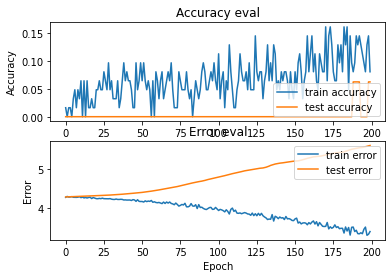

1/1 - 0s - loss: 5.1255 - accuracy: 0.0000e+00 - 12ms/epoch - 12ms/step

Test accuracy: 0.0


In [10]:

def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """


    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates RNN-LSTM model
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(73, activation='softmax'))#########104 karna h 

    return model


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (14,1) # 130, 13
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=200)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)